In [1]:
import os
import pandas as pd
import statistics
from datetime import date
from tqdm import tqdm
import plotly.express as px

In [2]:
cd ..

/Users/pedrocosta/MSE/VI/Projet/projet_vi


In [3]:
import settings as st

## Usefull path

In [4]:
armed_conflict = st.files['armed_conflict']

In [5]:
armed_conflict_path = os.path.join(armed_conflict, "armed_conflict.xlsx")
articles_armed_conflict_path = os.path.join(armed_conflict, "articles_armed_conflict.xlsx")
pruned_aricles_armed_conflict_path = os.path.join(armed_conflict, "pruned_articles_armed_conflict.xlsx")

## Read the excel file

In [6]:
df = pd.read_excel(pruned_aricles_armed_conflict_path)

In [7]:
durations = []

for _, row in df.iterrows():
    duration = row.date_end - row.date_start 
    durations.append(duration.days)

In [8]:
articles = []

for _, row in df.iterrows():
    articles.append(0 if row.number_of_sources < 0 else row.number_of_sources)

In [14]:
articles_by_duration = {}

for _, row in tqdm(df.iterrows()):
    
    duration = row.date_end - row.date_start
    duration = duration.days
    article = row.number_of_sources
    
    if duration > 1:
    
        if duration not in articles_by_duration.keys():
            articles_by_duration[duration] = []
    
        articles_by_duration[duration].append(article)

47239it [00:11, 4128.80it/s]


In [15]:
plot_df = pd.DataFrame(columns=['median_article', 'duration'])

for duration in articles_by_duration.keys():
        articles = articles_by_duration[duration]
        median_articles = sum(articles)

        new_row = {'duration': duration, 'median_article': median_articles}
        plot_df = plot_df.append(new_row, ignore_index=True)

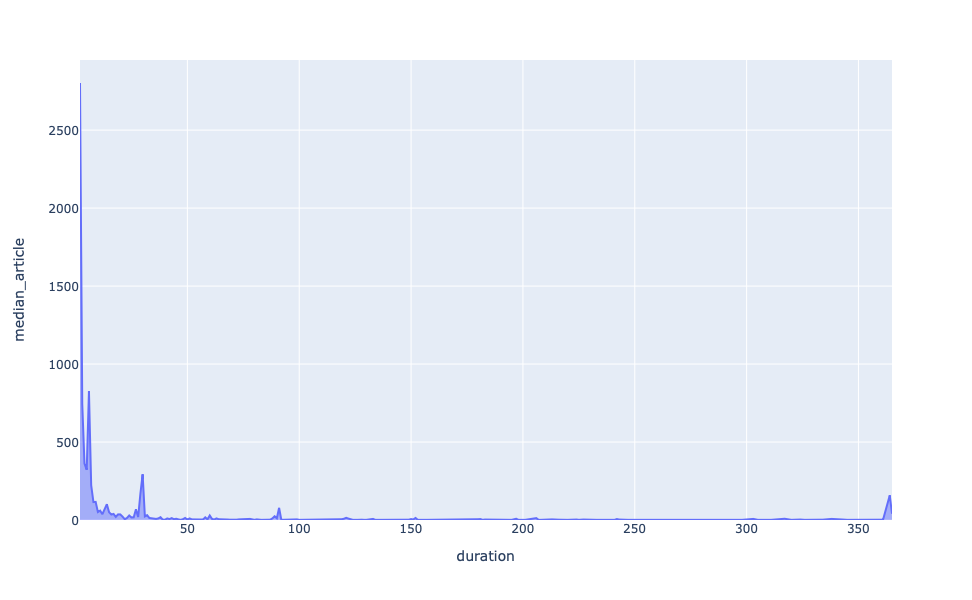

In [16]:
fig = px.area(plot_df, x='duration', y='median_article')
fig.show()

In [64]:
deaths_by_duration = {}

for _, row in tqdm(df.iterrows()):
    
    duration = row.date_end - row.date_start
    duration = duration.days
    deaths = row.deaths_a + row.deaths_b + row.deaths_civilians
    
    if duration not in deaths_by_duration.keys():
        deaths_by_duration[duration] = []
    
    deaths_by_duration[duration].append(deaths)

47239it [00:13, 3604.12it/s]


In [67]:
plot_df = pd.DataFrame(columns=['median_deaths', 'duration'])

for duration in deaths_by_duration.keys():
        deaths = deaths_by_duration[duration]
        median_deaths = statistics.median(deaths)

        new_row = {'duration': duration, 'median_deaths': median_deaths}
        plot_df = plot_df.append(new_row, ignore_index=True)

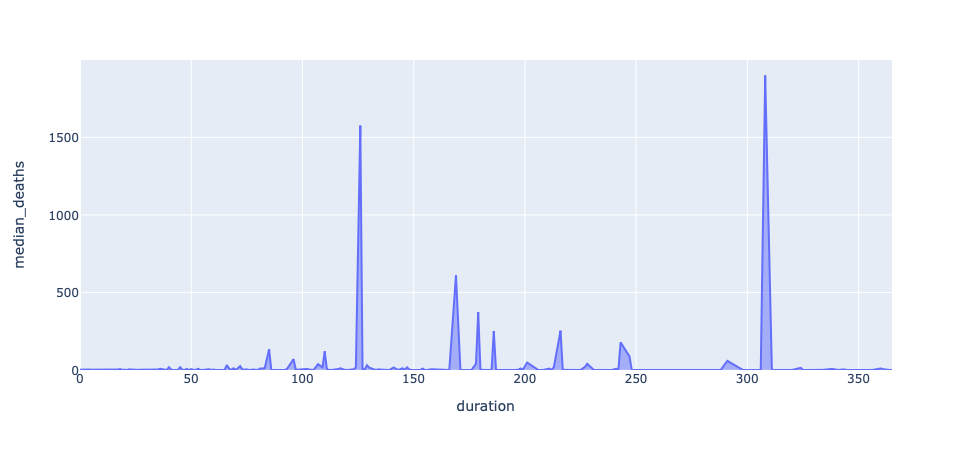

In [68]:
fig = px.area(plot_df, x='duration', y='median_deaths')
fig.show()

In [73]:
deaths_dict = {'deaths_a': 0, 'deaths_b': 0, 'deaths_civilian': 0}

for _, row in tqdm(df.iterrows()):
    deaths_dict['deaths_a'] += row.deaths_a
    deaths_dict['deaths_b'] += row.deaths_b
    deaths_dict['deaths_civilian'] += row.deaths_civilians

47239it [00:09, 5222.24it/s]


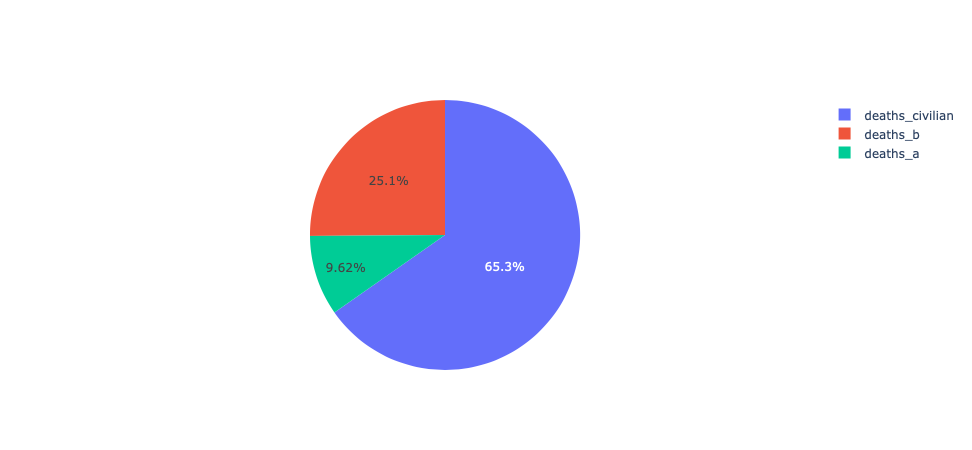

In [76]:
import plotly.graph_objects as go

labels = list(deaths_dict.keys())
values = list(deaths_dict.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [7]:
deaths_per_articles = {}

for _, row in tqdm(df.iterrows()):
    
    articles = 0 if row.number_of_sources < 0 else row.number_of_sources
    deaths = row.deaths_a + row.deaths_b + row.deaths_civilians
    country = row.country
    
    if country not in deaths_per_articles.keys():
        deaths_per_articles[country] = []
    
    deaths_per_articles[country].append(deaths/articles)

47239it [00:10, 4378.60it/s]


In [9]:
mean_deaths_per_articles = {}

for country in deaths_per_articles.keys():
    mean_deaths_per_articles[country] = statistics.mean(deaths_per_articles[country])

In [10]:
mean_deaths_per_articles

{'Mali': 3.6664307893976096,
 'Congo, The Democratic Republic of the': 5.417977382179717,
 'India': 1.6873506079874003,
 'Mozambique': 2.053098499673842,
 'Central African Republic': 5.214469566578,
 'Russian Federation': 1.8183981727085174,
 'Iraq': 12.317522077186478,
 'Afghanistan': 6.190315806399669,
 'South Sudan': 4.775714675714676,
 'Nigeria': 6.893168372909675,
 'Egypt': 4.855651357765328,
 'Philippines': 3.270372332909425,
 'Algeria': 1.7726931436475004,
 'Yemen': 8.707726007326007,
 'Lebanon': 2.8077972709551657,
 "Lao People's Democratic Republic": 3.6909262550315183,
 'Sudan': 4.382206861239119,
 'Turkey': 3.420953881030848,
 'Pakistan': 5.62454051796157,
 'Kenya': 1.3540053035684951,
 'Bangladesh': 1.028695652173913,
 'Libya': 5.95613711001642,
 'Cameroon': 4.729121297271982,
 'Nicaragua': 11.76418439716312,
 'United Kingdom': 1.2689003436426116,
 'Azerbaijan': 5.434553521907931,
 'Venezuela, Bolivarian Republic of': 0.8162477954144621,
 'El Salvador': 35.8093567251462,
 '